<font color=gray>This Jupyter notebook was created by Kaisa Taipale for \the\world Girls' Machine Learning Day Camp. The license can be found at the bottom of the notebook.</font>

# Exploratory data analysis

One of the ways that access to computers has changed math and statistics and created new-ish fields like data science and machine learning is by giving easy ability to visualize and explore data. Exploratory data analysis is a philosophy and set of techniques for gaining insight into data sets and exploring their strengths and weaknesses.

Let's do some exploratory data analysis and along the way learn a bit about plotting using Python in Jupyter notebooks. 

In [28]:
import numpy as np  # This is the numerical library you've used before
import pandas as pd # This library helps with dealing with data
import matplotlib.pyplot as plt # This is a plotting (graphing) library
import seaborn as sns # This is a library that makes graphics prettier and gives us some nice tools
from scipy import stats 
%matplotlib inline 
# The last line makes your plots show up in the Jupyter notebook 
# rather than another window

Let's import some data I will call mystery data for now. It will be a pretty easy data set to understand once you know what it is.... but we'll purposefully not tell you for a minute!

In [5]:
df = pd.read_csv("Mystery-data-1.csv") # We call this df for "data frame"

Let's look at the data. Head is a function that shows the top five lines of a dataframe with the column names.

In [6]:
df.head() 

,X,Number
0,1,2864
1,2,1460
2,3,2921
3,4,2921
4,5,2921


From this quick look, it seems like the first column is just an index (the row number in the comma-separated value file) and the second number has the data we're interested in. Is this true? 


In [7]:
df.tail()

,X,Number
38,39,1461
39,40,2922
40,41,1461
41,42,2922
42,43,1110


Well, the end of the file seems to support this idea! 

How would you test the hypothesis that the first column is just the row number? You could just look at the file :) We'll come back to the idea in a minute though.

## Descriptive statistics

Ok -- what can we do to analyze the second column? Let's compute the numbers (the statistics) that we discussed yesterday. Mean, median, mode, range, standard deviation, variance. What do these tell you?

In [8]:
np.mean(df['Number']) # Notice that since I want only the mean of the
                      # column named 'Number', I select the column from df
                      # by writing df['Number'].

1823.5348837209303

In [11]:
np.median(df['Number'])

1460.0

There is actually no mode function in Numpy -- we have to go to the Scipy statistics module. The documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) says that 
* mode returns the number that is the mode and then the count
* if there are many numbers with the same count, mode will only tell you the smallest one

In [12]:
stats.mode(df['Number'])

ModeResult(mode=array([1460]), count=array([12]))

Looks like the number 1460 occurs twelve times. It's also the median. But the mean is rather larger. 

How can we streamline our work here? Use the describe function!

In [14]:
df.describe()

,X,Number
count,43.000000,43.000000
mean,22.000000,1823.534884
std,12.556539,907.371907
min,1.000000,31.000000
25%,11.500000,1443.500000
50%,22.000000,1460.000000
75%,32.500000,2837.000000
max,43.000000,4452.000000


In just one line we get the mean, range, and quartiles, as well as standard deviation.

This is very useful... and yet I don't feel like I know anything about this data.

## Data visualization

Easy data visualization has totally changed how data analysis works. Let's do some of that. First, a scatter plot of the first column against the second column. Is there a relationship between the two?

Text(0, 0.5, 'Frequency')

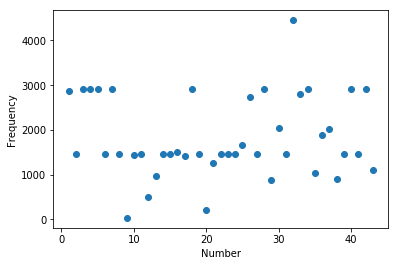

In [22]:
plt.scatter(df['X'],df['Number']) # This is a scatter plot with df['X'] 
                                  # as the x-coordinate and df['Number']
                                  # as the y-coordinate.
plt.xlabel('Number')              # This adds a label to the x-axis
plt.ylabel('Frequency')           # This adds a label to the y-axis

Next, a histogram. What is the distribution of the values?

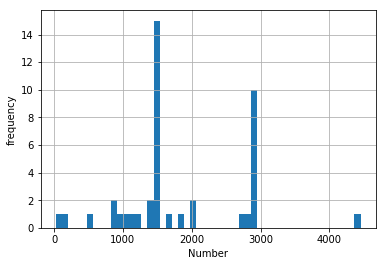

In [18]:
plt.hist(df['Number'], bins=50)
plt.xlabel('Number')
plt.ylabel('frequency')
plt.grid(True)


This tells us that there are two numbers that occur often, and one outlying value above 4000.... 

Let's count the values.

In [26]:
df['Number'].value_counts()

1460    12
2921     6
2922     3
1461     2
895      1
4452     1
1418     1
1036     1
2027     1
1427     1
1110     1
1886     1
31       1
1503     1
199      1
2727     1
2039     1
491      1
1260     1
2864     1
881      1
1655     1
2810     1
967      1
Name: Number, dtype: int64

I have a suspicion....

In [27]:
2921/1460

2.000684931506849

Interesting. The second most frequent value is approximately 2 times the most frequent value.

We've used a lot of tools to understand our data, including head and tail and describe, scatter plots, and histograms. Now it's time to look at the actual topic. In machine learning and data science we call this using 'domain expertise'.

In [31]:
us_presidents = pd.read_csv("Presidents-term-data.csv") # We call this df for "data frame"

In [32]:
us_presidents.head()

,X,President,Days
0,1,Washington,2864
1,2,Adams,1460
2,3,Jefferson,2921
3,4,Madison,2921
4,5,Monroe,2921


Do the observations we made above make more sense now?!

Let's pick out the presidents with the fewest days served....

In [44]:
us_presidents.nsmallest(2, 'Days') # Change the number to get more or fewer rows

,X,President,Days
8,9,Harrison,31
19,20,Garfield,199


Can you change the above command to get the five presidents who served the least number of days?

In [ ]:
# Find the presidents who served the least number of days




In [41]:
# Likewise we can find the presidents who served the largest number of days

us_presidents.nlargest(14, 'Days')

,X,President,Days
31,32,Roosevelt,4452
33,34,Eisenhower,2922
39,40,Reagan,2922
41,42,Clinton,2922
2,3,Jefferson,2921
3,4,Madison,2921
4,5,Monroe,2921
6,7,Jackson,2921
17,18,Grant,2921
27,28,Wilson,2921


1) How many terms did the Roosevelt in row 31 serve, then? And why is there a Roosevelt in row 25 also? Are they different Roosevelts? Use your domain expertise!

2) Is someone missing? Why?! Use your domain expertise and look back at your data!

## Selecting from pandas dataframes

What if we want to look at a president by name? I don't see Lincoln in the lists above.

In [45]:
us_presidents.loc[us_presidents['President'] == 'Lincoln']

,X,President,Days
15,16,Lincoln,1503


What about selecting the 20th row? How do we do that?

In [47]:
us_presidents.iloc[20]

X                21
President    Arthur
Days           1260
Name: 20, dtype: object

What about selecting the president's name in row 20?

In [51]:
us_presidents.loc[20,'President']

'Arthur'

Your turn:

In [52]:
# Find the name of the president in row 18:



In [55]:
# Find the row of President Millard Filmore


Congrats! You now know how to plot a few things and select rows and columns of pandas dataframes!